In [23]:
var('gamma lamb')
delta=sqrt((gamma+1)/(gamma-1))*arctan(sqrt((gamma-1)/(gamma+1)*(lamb^2-1)/(1-(gamma-1)/(gamma+1)*lamb^2))) -arctan(sqrt((lamb^2-1)/(1-(gamma-1)/(gamma+1)*lamb^2)))
delta=delta.subs(gamma=1.4)
d=plot(delta,(lamb,0.01,3),title="$\delta$ vs $\lambda$",hue=0.8,alpha=0.9,transparent=True)
tl=text("$\lambda$",(2.4,0.1))
td=text("$\delta$",(1.01,2))
(d+td+tl).save("aerodyn_3_delta.png")

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 103 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'unable to convert 2.27685316369070 + 1.49035927873741*I to float; use abs() or real_part() as desired'


<>:4: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \l
<>:6: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \l
<>:6: DeprecationWarning: invalid escape sequence \d
<ipython-input-23-545300aa6cf0>:4: DeprecationWarning: invalid escape sequence \d
  d=plot(delta,(lamb,RealNumber('0.01'),Integer(3)),title="$\delta$ vs $\lambda$",hue=RealNumber('0.8'),alpha=RealNumber('0.9'),transparent=True)
<ipython-input-23-545300aa6cf0>:5: DeprecationWarning: invalid escape sequence \l
  tl=text("$\lambda$",(RealNumber('2.4'),RealNumber('0.1')))
<ipython-input-23-545300aa6cf0>:6: DeprecationWarning: invalid escape sequence \d
  td=text("$\delta$",(RealNumber('1.01'),Integer(2)))


In [64]:
from sage.plot.colors import rainbow
clr=rainbow(8);

# Shock Wave
delta,Ma1,gamma,beta=SR.var('delta Ma1 gamma beta')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
sol1=solve(eq1,Ma1)[1]#Critical: Solve for Ma1 instead of beta
sol1m=solve(sol1.subs(beta==1.2),Ma1,solution_dict=True)
sol1m=sol1m[0][Ma1]# Find Ma1 for specific delta
#delta==0
fg1=implicit_plot(sol1.subs(delta=0),(Ma1,1,4),(beta,0.2,pi/2),color=clr[0],
                  axes_labels=(r'$Ma_1$',r'$\beta$'),title=r'$\beta\ vs\ Ma_1$')
fg1+=text(r'$\delta=0^\circ$',(1.2,0.8),color=clr[0])
# plot3d(sol1,(Ma1,1,4),(beta,0,pi/2))
# contour_plot(sol1,(Ma1,1,4),(beta,0,pi/2))
        # sol1=solve([eq1.subs(delta==3*pi/36)],Ma1)
        #         #    to_poly_solve=True)
        # implicit_plot(sol1[1],(Ma1,1,4),(beta,0,pi/2))
# implicit_plot(sol1[1],(Ma1,1,4),(beta,pi/15,pi/2))

# f11+=text3d(r'$\delta$',(0.2,0.2,0.2))
# dmdb=derivative(sol1[1],beta);
# solve(dmdb==0,beta)
for i in range(1,8):
    fg1+=implicit_plot(sol1.subs(delta=i*pi/36),(Ma1,1,4),(beta,0.2,pi/2),color=clr[i])
    delt='$'+str(i*5)+'^\\circ$'
    fg1+=text(r'%s'%delt,(sol1m.subs(delta=i*pi/36)+0.1,1.1),color=clr[i])
end
fg1.save_image('1_2d.png')
fg1
fg1_3d=Graphics()
fg1_3d=implicit_plot3d(eq1,(Ma1,1,4),(beta,pi/15,pi/2),(delta,0,pi/3.5),
                color='#c0ebd7',axes_labels=['Ma1','beta','delta'])
fg1_3d
# fg1==implicit_plot([sol1[1].subs(delta=k*pi/18)) for k in range(0,7)],(Ma1,1,3),(beta,pi/15,pi/2))

Graphics3d Object

In [14]:
#find text pos (deprecated)
delta,Ma1,gamma,beta=SR.var('delta Ma1 gamma beta')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
# sol1=solve(eq1,Ma1)
# sol1=sol1[1]

sol1=eq1
sol1d=solve(sol1.subs(Ma1==1.2,beta==pi/4),delta)
sol1d
# find_root(sol1d.subs(beta=pi/4),0,1)
# sol1m[0][Ma1].subs(delta=0.2)
# dmdb=derivative(sol1,beta)
# sol1d=solve(dmdb.subs(delta=0.4)==0,beta)
# find_root(sol1,1,pi/2-0.05)

[delta == -arctan(35/251)]

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 16 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.20379237810420833)'
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 15 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.19771342522750943)'
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 32 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.5207963267948965)'
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 31 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.5207963267948965)'
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at

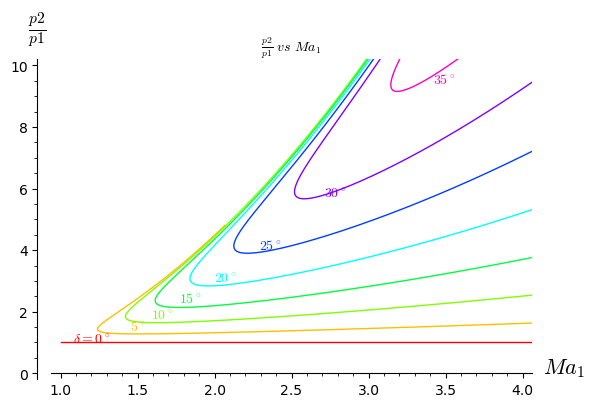

In [63]:
#Shock Wave 2'
from sage.plot.colors import rainbow
clr=rainbow(8);
delta,Ma1,gamma,beta,pp=SR.var('delta Ma1 gamma beta pp')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
eq2=pp==2*gamma/(gamma+1)*Ma1^2*sin(beta)^2-(gamma-1)/(gamma+1)
eq2=eq2.subs(gamma=1.4)
# sol2sb=solve(eq1,sin(beta),solution_dict=True)#sin(beta)
# eq22=sin(beta)==sol2sb[0][sin(beta)]
# eq2.subs(sin(beta)=sol2sb)
sol2=solve([eq1,eq2],[pp,Ma1],solution_dict=True)
# sol2=solve([eq2.subs(eq22)],[Ma1,pp])#poor ability to solve equations. only use substitution can help.
# sol2=solve(sol2,Ma1)
sud=0;bb=0.05
fg2=parametric_plot((sol2[1][Ma1].subs(delta=sud),sol2[1][pp].subs(delta=sud)),(beta,0.1,pi/2-bb),color=clr[0],
                  axes_labels=(r'$Ma_1$',r'$\frac{p2}{p1}$'),title=r'$\frac{p2}{p1}\ vs\ Ma_1$')
fg2+=parametric_plot((sol2[0][Ma1].subs(delta=sud),sol2[0][pp].subs(delta=sud)),(beta,0.1,pi/2-bb),color=clr[0])
fg2+=text(r'$\delta=0^\circ$',(1.2,1.1),color=clr[0])
for i in range(1,8):
    sud=i*pi/36
    fg2+=parametric_plot((sol2[1][Ma1].subs(delta=sud),sol2[1][pp].subs(delta=sud)),(beta,0.1,pi/2-bb),color=clr[i])
    fg2+=parametric_plot((sol2[0][Ma1].subs(delta=sud),sol2[0][pp].subs(delta=sud)),(beta,0.1,pi/2-bb),color=clr[i])
    tx=sol2[1][Ma1].subs(delta=sud,beta=pi/3)+0.2;
    ty=sol2[1][pp].subs(delta=sud,beta=pi/3)+0.2;
    delt='$'+str(i*5)+'^\\circ$'
    fg2+=text(r'%s'%delt,(tx,ty),color=clr[i])
end
fg2.show(xmin=1,xmax=4,ymin=0,ymax=10,aspect_ratio=0.2)
fg2.save_image('2_2d.png',xmin=1,xmax=4,ymin=0,ymax=10,aspect_ratio=0.2)

In [ ]:
#Shock wave 2 p/p
var('pp gamma Ma1 beta')
pp=2*gamma/(gamma+1)*Ma1^2*sin(beta)^2-(gamma-1)/(gamma+1)
pp=pp.subs(gamma=1.4)
# plot3d(pp,(Ma1,1,4),(beta,pi/15,pi/2),xlabel='Ma1',ylabel='beta',zlabel='p2/p1')
# fg1=plot(pp.subs(beta=0),(Ma1,1,4),axes_labels=['Ma1','p2/p1'],color=clr[0],title=r'$\frac{p_2}{p_1}$ vs $Ma_1$')
# for i in range(1,8):
#     print(pp.subs(beta=i*pi/36))
#     fg1+=plot(pp.subs(beta=i*pi/36),(Ma1,1,4),color=clr[i])
# end
# fg1
# f=s.function(x)

AttributeError: 'Sequence_generic' object has no attribute 'subs'

In [1]:
from sage.plot.colors import rainbow
clr=rainbow(8);
#Shock Wave 3
delta,Ma1,Ma2,gamma,beta,pp=SR.var('delta Ma1 Ma2 gamma beta pp')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
eq3=Ma2^2==(Ma1^2+2/(gamma-1))/(2*gamma/(gamma-1)*Ma1^2*sin(beta)^2-1)+2/(gamma-1)*Ma1^2*cos(beta)^2/(Ma1^2*sin(beta)^2+2/(gamma-1))
eq3=eq3.subs(gamma=1.4)
sol3=solve([eq1,eq3],[Ma1,Ma2],solution_dict=True)#this gives 4 sets of solution
sol32=solve(eq3.subs(beta=pi/2),[Ma2],solution_dict=True)#another solution
sud=0;bb=0.05
fg3=parametric_plot((sol3[3][Ma1].subs(delta=sud),sol3[3][Ma2].subs(delta=sud)),(beta,0.1,pi/3-bb),color=clr[0],
                  axes_labels=(r'$Ma_1$',r'$Ma_2$'),title=r'$Ma_2\ vs\ Ma_1$')
fg3+=plot(sol32[1][Ma2],(Ma1,1,4),color=clr[0])
fg3+=text(r'$\delta=0^\circ$',(1.15,1.35),color=clr[0])
for i in range(1,8):
    sud=i*pi/36
    fg3+=parametric_plot((sol3[3][Ma1].subs(delta=sud),sol3[3][Ma2].subs(delta=sud)),(beta,0.1,pi/3-bb),color=clr[i])
    fg3+=parametric_plot((sol3[1][Ma1].subs(delta=sud),sol3[1][Ma2].subs(delta=sud)),(beta,0.1,pi/3-bb),color=clr[i])
    tx=sol3[1][Ma1].subs(delta=sud,beta=pi/2.4);
    ty=-sol3[1][Ma2].subs(delta=sud,beta=pi/2.4)+0.2;
    delt='$'+str(i*5)+'^\\circ$'
    fg3+=text(r'%s'%delt,(tx,ty),color=clr[i])
end
fg3.show(xmin=1,xmax=4,ymin=0,ymax=4,aspect_ratio=0.5)
fg3.save_image('3_2d.png',xmin=1,xmax=4,ymin=0,ymax=4,aspect_ratio=0.5)
fg3.save_image('3_2d.eps',xmin=1,xmax=4,ymin=0,ymax=4,aspect_ratio=0.5)
# implicit_plot3d(eq3,(Ma1,1,4),(Ma2,0.3,4),(beta,0,pi/3.5))

NameError: name 'clr' is not defined

verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 35 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.20987392654089496)'
verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 35 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.20975028620814265)'
verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 68 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.31258607163312907)'
verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 68 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.3132840686322348)'
verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function a

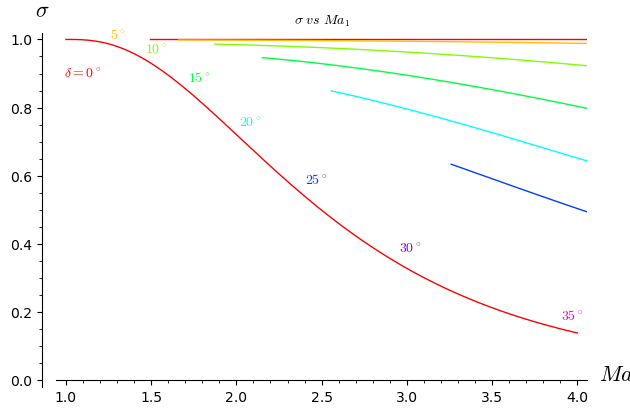

In [26]:
from sage.plot.colors import rainbow
clr=rainbow(8);
#Shock Wave 4
delta,Ma1,Ma2,gamma,beta,pp,sigma=SR.var('delta Ma1 Ma2 gamma beta pp sigma')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
eq4=sigma==(2*gamma/(gamma+1)*Ma1^2*sin(beta)^2-(gamma-1)/(gamma+1))^(-1/(gamma-1))*((gamma+1)*Ma1^2*sin(beta)^2/((gamma-1)*Ma1^2*sin(beta)^2+2))^(gamma/(gamma-1))
eq4=eq4.subs(gamma=1.4)
sol4=solve([eq1,eq4],[Ma1,sigma],solution_dict=True)
sol42=solve(eq4.subs(beta=pi/2),sigma,solution_dict=True)#another solution

sud=0;bb=0.05
fg4=parametric_plot((sol4[1][Ma1].subs(delta=sud),sol4[1][sigma].subs(delta=sud)),(beta,0.1,pi/4-bb),color=clr[0],
                  axes_labels=(r'$Ma_1$',r'$\sigma$'),title=r'$\sigma\ vs\ Ma_1$')
# fg4+=parametric_plot((sol4[4][Ma1].subs(delta=sud),sol4[4][Ma2].subs(delta=sud)),(beta,0.1,pi/4-bb),color=clr[0])
fg4+=plot(sol42[0][sigma],(Ma1,1,4),color=clr[0])
fg4+=text(r'$\delta=0^\circ$',(1.1,0.9),color=clr[0])
for i in range(1,8):
    sud=i*pi/36
    fg4+=parametric_plot((sol4[1][Ma1].subs(delta=sud),sol4[1][sigma].subs(delta=sud)),(beta,0.1,pi/4-bb),color=clr[i])
    fg4+=parametric_plot((sol4[0][Ma1].subs(delta=sud),sol4[0][sigma].subs(delta=sud)),(beta,0.1,pi/4-bb),color=clr[i])
    tx=sol4[1][Ma1].subs(delta=sud,beta=pi/2.4)+0.05;
    ty=sol4[1][sigma].subs(delta=sud,beta=pi/2.4)+0.02;
    delt='$'+str(i*5)+'^\\circ$'
    fg4+=text(r'%s'%delt,(tx,ty),color=clr[i])
end
fg4.show(xmin=1,xmax=4,ymin=0,ymax=1,aspect_ratio=2)
# fg4.save_image('4_2d.png',xmin=1,xmax=4,ymin=0,ymax=1,aspect_ratio=2)


In [56]:
import numpy as np
delta,Ma1,Ma2,gamma,beta,pp,sigma=SR.var('delta Ma1 Ma2 gamma beta pp sigma')
eq1=tan(delta)==(Ma1^2*sin(beta)^2-1)/(tan(beta)*(Ma1^2*((gamma+1)/2-sin(beta)^2)+1))
eq1=eq1.subs(gamma=1.4)
eq4=sigma==(2*gamma/(gamma+1)*Ma1^2*sin(beta)^2-(gamma-1)/(gamma+1))^(-1/(gamma-1))*((gamma+1)*Ma1^2*sin(beta)^2/((gamma-1)*Ma1^2*sin(beta)^2+2))^(gamma/(gamma-1))
eq4=eq4.subs(gamma=1.4)
sol4=solve([eq1,eq4],[Ma1,sigma],
           #solution_dict=True
           )
sol4=sol4[1]
sol4_2=solve([sol4[1],eq1],[Ma1,delta],
            #  solution_dict=True
             )


# iterate Delta
# sol4_2=sol4_2
# sol4_tdel=sol4_2[0].subs(delta==pi/8)
# sol4_sig=sol4_2[1].subs(delta==pi/8)
# betas=np.arange(0,pi/2,0.1)
# #iterate beta
# #ma1 -> sigma
# print(sol4_tdel)
# sol4_bet_itr=find_root(sol4_tdel.subs(beta=betas[4]),1,4)

# print(sol4_bet_itr)


# solsig=sol4_2[1][sigma].subs(sol4_2[0]) #sigma

# solsig_itr=solsig.subs(beta==pi/8)
# solsig_itr=solsig_itr.subs(Ma1==Ma1s[1]).n()
# sol1m=solve(sol1.subs(beta==1.2),Ma1,solution_dict=True)
# sol1m[0][Ma1].subs(delta=0.2)
# dmdb=derivative(sol1,beta)
# sol1d=solve(dmdb.subs(delta=0.4)==0,beta)
# find_root(sol1,1,pi/2-0.05)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9])